In [975]:
import pandas as pd
import os
import numpy as np
from keras import utils
from tensorflow.keras.callbacks import TensorBoard
from time import time
import tensorflow as tf

In [1255]:
question12 = pd.read_csv('/kaggle/input/datasetar/Data/Question_12.csv', sep=',')
question12.head()

,ID,Question,Réponse,Score
0,12,كم كان عمر النَّبيُّ -صلّى الله وعليه وسلّم- ع...,كان عمره عند الوفاة ثلاث وستِّين سنةً، وقد توف...,2
1,12,كم كان عمر النَّبيُّ -صلّى الله وعليه وسلّم- ع...,ثلاث وستِّين سنةً,1
2,12,كم كان عمر النَّبيُّ -صلّى الله وعليه وسلّم- ع...,ثلاث وستِّين سنةً,1
3,12,كم كان عمر النَّبيُّ -صلّى الله وعليه وسلّم- ع...,ثلاث وستِّين سنةً,1
4,12,كم كان عمر النَّبيُّ -صلّى الله وعليه وسلّم- ع...,ثلاث وستِّين سنةً,1


In [1256]:
question12['Score'].unique()

array(['2', '1', '0', ' 1', '  في السَّنة الثَّالثة عشرة للهجرة 2', nan],
      dtype=object)

In [1257]:
import pandas as pd

# Suppose data is your DataFrame
question12['Score'] = question12['Score'].astype(str)  # Ensure the 'Score' column is of string type

# Filter the 'Score' column
allowed_values = ['1', '0', '2']
question12 = question12[question12['Score'].isin(allowed_values)]

# Display the unique values in the 'Score' column after filtering
print(question12['Score'].unique())


['2' '1' '0']


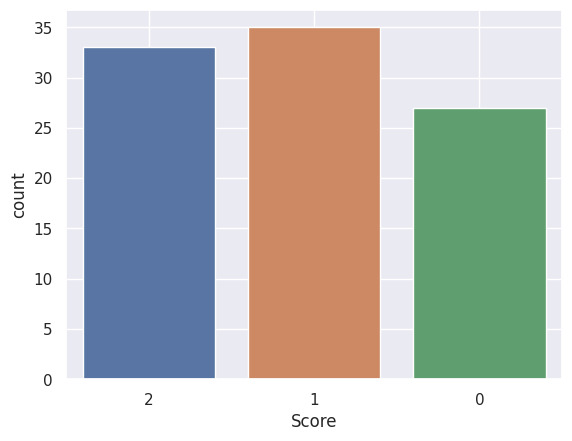

In [1258]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = question12, x= 'Score')
plt.grid(True)
plt.show()

In [1259]:
question12.isnull().sum()

ID          0
Question    0
Réponse     0
Score       0
dtype: int64

In [1260]:
rows_with_null_values = question12[question12['Réponse'].isnull()]

# Now you can display or inspect the rows
print(rows_with_null_values)

Empty DataFrame
Columns: [ID, Question, Réponse, Score]
Index: []


In [1201]:
# Assuming your DataFrame is named 'question4'
#
# question15.dropna(subset=['Réponse'], inplace=True)


In [1261]:
question12['Réponse'].isna().sum()

0

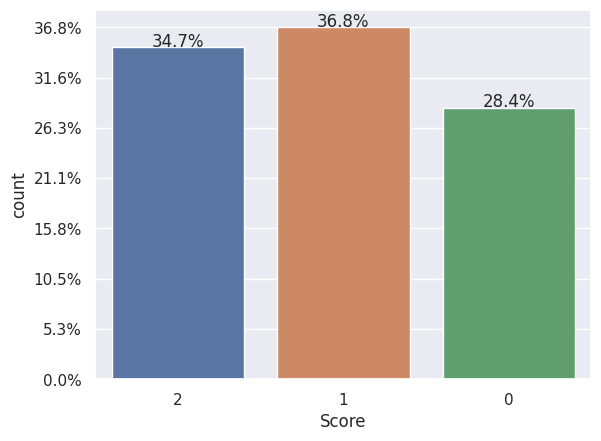

In [1262]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'data' is your DataFrame and 'Score' is a column in your DataFrame
sns.set(style="darkgrid")

# Create the count plot
ax = sns.countplot(data=question12, x='Score')

# Calculate the percentage of each category
total = len(question12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total:.1%}', ha="center")

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

plt.show()

In [1263]:
question12.shape

(95, 4)

In [1264]:
question12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        95 non-null     int64 
 1   Question  95 non-null     object
 2   Réponse   95 non-null     object
 3   Score     95 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.7+ KB


In [1265]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset
# Replace 'your_column' with the actual column name you want to check for duplicates

# Check for duplicates based on all columns
duplicate_rows = question12[question12.duplicated()]

# Check for duplicates based on a specific column
duplicate_rows_specific_column = question12[question12.duplicated(subset=['Réponse'])]

# Get the number of duplicates
num_duplicates = len(duplicate_rows)
num_duplicates_specific_column = len(duplicate_rows_specific_column)

print(f"Total duplicates: {num_duplicates}")
print(f"Duplicates in 'Réponse': {num_duplicates_specific_column}")


Total duplicates: 16
Duplicates in 'Réponse': 16


In [1116]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [301]:
!pip install -U nltk

In [1207]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))
#stop_words

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1266]:
#data avant stopwrds removed
question12['Réponse']

0     كان عمره عند الوفاة ثلاث وستِّين سنةً، وقد توف...
1                                     ثلاث وستِّين سنةً
2                                     ثلاث وستِّين سنةً
3                                     ثلاث وستِّين سنةً
4                                     ثلاث وستِّين سنةً
                            ...                        
95     كان عمره ثلاثة وستون عامًا، وذلك في السنة الث...
96                                            سن الستين
97                            في عام الثانية عشر للهجرة
98                            في عام الرابعة عشر للهجرة
99                            في عام الخامسة عشر للهجرة
Name: Réponse, Length: 95, dtype: object

In [1267]:
#Drop stop words
from nltk.stem.arlstem import ARLSTem
stemmmer = ARLSTem()

def remove_stowords(elements):
    corps = []
    for string in elements :
        string = nltk.sent_tokenize(string.strip())
        string = [ stemmmer.stem(word) for word in string if not word in stop_words ]
        string = ''.join(string)
        corps.append(string)
    return corps

In [1268]:
corps12 = remove_stowords(question12['Réponse'])

In [1086]:
#data after applying stopwords
# corps4

In [1269]:
# tokenization
from keras.preprocessing.text import Tokenizer,text_to_word_sequence , one_hot , text_to_word_sequence
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle




# Train tokenization
tokenizer = Tokenizer(filters=''''!"#$%&()+,-./:;<=>?@[\\]^{|}~\t\n÷×؛<>()&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )
#tokenizer = Tokenizer(filters='#' )

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(corps12)

with open('TokenizerModel12.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(corps12)

# Pad sequences to ensure uniform length
max_sequence_length = max(len(s) for s in sequences)
sequences = pad_sequences(sequences, max_sequence_length)

# Get the word-to-index mapping
vocab_dict = tokenizer.word_index

# Calculate the vocabulary size
vocab_size = len(vocab_dict) + 1

#print(vocab_dict)

In [1270]:
max_sequence_length

24

In [1213]:
# vocab_dict

In [38]:
!pip3 install gensim

In [39]:
from gensim.models import KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format("/kaggle/input/fast-text-translation-data/fast_text_files/vectors/wiki.ar.vec")

In [1271]:
# Word Embedding
from keras.layers import Embedding
import numpy as np

# Embedding Dimension
EMBEDDING_DIM = 300

# Total number of words in the vocabulary, including an index for unknown words
num_words = len(vocab_dict) + 1

# Counter for words not present in the FastText model
count = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

# Iterate through each word in the vocabulary
for word, idx in vocab_dict.items():
    # Check if the word is present in the FastText model
    if word in fasttext_model:
        # If yes, assign the FastText model's embedding vector to the word in the matrix
        embedding_matrix[idx] = fasttext_model.get_vector(word)
    else:
        # If the word is not present, increment the counter and print a message
        count += 1
        print("Word does not exist in the vocabulary ---> " + word)

       # Note: We could also assign a special embedding vector for unknown words.
        embedding_matrix[idx] = fasttext_model.get_vector("unk")

Word does not exist in the vocabulary ---> 13
Word does not exist in the vocabulary ---> 40
Word does not exist in the vocabulary ---> 63
Word does not exist in the vocabulary ---> 632
Word does not exist in the vocabulary ---> فاةالرسول


In [1272]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10685   , -0.062513  , -0.20926   , ...,  0.043603  ,
         0.0070054 ,  0.097782  ],
       [-0.11741   ,  0.059606  , -0.27281001, ..., -0.060135  ,
         0.16716   ,  0.12272   ],
       ...,
       [ 0.21615   ,  0.21889   , -0.049481  , ..., -0.13906001,
         0.12826   ,  0.36548001],
       [-0.25591001, -0.37051001, -0.51898998, ..., -0.25441   ,
        -0.12774999,  0.2683    ],
       [ 0.068931  ,  0.38620001, -0.41514999, ..., -0.083423  ,
         0.18935999,  0.051322  ]])

In [1273]:
X = sequences

In [1274]:
# X

In [1275]:
Score = question12['Score']
y = tf.keras.utils.to_categorical(
    Score, num_classes=3, dtype='float32'
)

In [1220]:
# y

In [1283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1285]:
y_test.shape

(29, 3)

In [1316]:
# from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from keras.layers import Dropout

input_dim=vocab_size
output_dim=33
input_length=max_sequence_length


# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
model.add(LSTM(units=10,kernel_regularizer=l2(0.0001)))
model.add(Dense(3, activation='softmax'))

Epoch 1/150
2/2 [==============================] - 3s 636ms/step - loss: 1.1052 - accuracy: 0.2727 - val_loss: 1.0979 - val_accuracy: 0.5517
Epoch 2/150
2/2 [==============================] - 0s 185ms/step - loss: 1.1010 - accuracy: 0.3485 - val_loss: 1.0947 - val_accuracy: 0.5172
Epoch 3/150
2/2 [==============================] - 0s 168ms/step - loss: 1.0979 - accuracy: 0.4091 - val_loss: 1.0921 - val_accuracy: 0.5862
Epoch 4/150
2/2 [==============================] - 0s 168ms/step - loss: 1.0948 - accuracy: 0.4848 - val_loss: 1.0908 - val_accuracy: 0.5862
Epoch 5/150
2/2 [==============================] - 0s 165ms/step - loss: 1.0916 - accuracy: 0.5606 - val_loss: 1.0897 - val_accuracy: 0.5862
Epoch 6/150
2/2 [==============================] - 0s 165ms/step - loss: 1.0885 - accuracy: 0.6061 - val_loss: 1.0881 - val_accuracy: 0.6207
Epoch 7/150
2/2 [==============================] - 0s 165ms/step - loss: 1.0853 - accuracy: 0.6212 - val_loss: 1.0860 - val_accuracy: 0.6207
Epoch 8/150
2

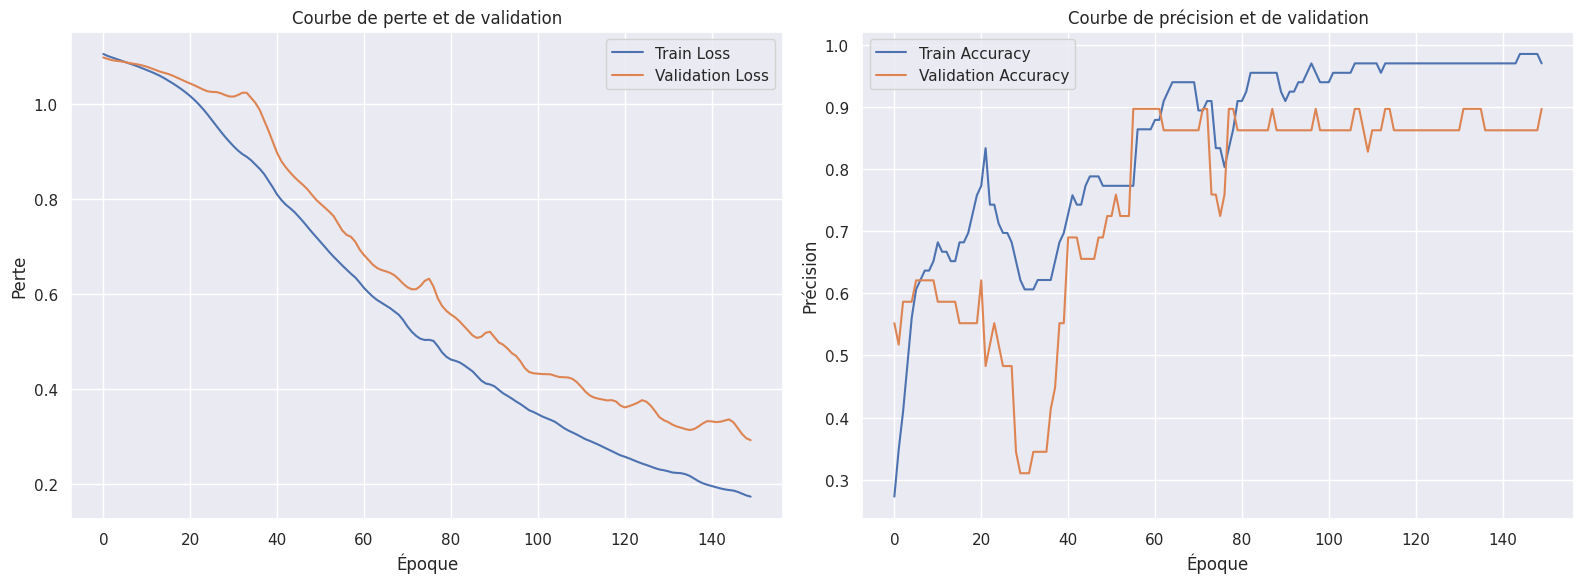

In [1317]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=64, epochs=150, verbose=1)



plt.figure(figsize=(16, 6))
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte et de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()


# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

In [1318]:
scores_trainig = model.evaluate(X_train, y_train, verbose=1)
print("Training Loss: %f%%" % (scores_trainig[0]))
print("Training Accuracy: %.2f%%" % (scores_trainig[1]*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.1716 - accuracy: 0.9697
Training Loss: 0.171562%
Training Accuracy: 96.97%


In [1319]:
scores_test = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss: %f%%" % (scores_test[0]))
print("Test Accuracy: %.2f%%" % (scores_test[1]*100))

1/1 [==============================] - 0s 26ms/step - loss: 0.2920 - accuracy: 0.8966
Test Loss: 0.292041%
Test Accuracy: 89.66%


In [1320]:
import numpy as np

def predict_sequence(model,response):
    
    response= remove_stowords(response)
    #print(corps)
# Convert texts to sequences of integers
    sequences = tokenizer.texts_to_sequences(response)

# Pad sequences to ensure uniform length

    sequences = pad_sequences(sequences, max_sequence_length)
   
    
    #print(sequences)
    # Reshape the input for model prediction
    #input_data = np.array([sequences])
    
    #print(input_data)
    # Make predictions
    predicted_probs = model.predict(sequences)
    predicted_value= np.argmax(predicted_probs, axis=1)
    
    #print(predicted_classes)
   
    return predicted_value[0]

In [1323]:
test=['عمره 63 سنة، في عام 632 م']

In [1324]:
predict_sequence(model,test)

1/1 [==============================] - 0s 21ms/step


2

In [1325]:
from keras.models import load_model

# Assuming 'model' is your Keras model
model.save('model12.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
